<a href="https://colab.research.google.com/github/ivan-mihailov/LS-Unit-2-Sprint-1-Assignments/blob/main/Ivan_Mihailov_LS_DS_212_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = wrangle(filepath)
print('There are', df.isna().sum().sum(), 'NaN values in the dataframe') # Check how many NaN values are in the dataframe
print(df.shape) # Show the shape of the dataframe
print(df.head()) # Verify the top 5 rows of the dataframe

There are 1568 NaN values in the dataframe
(48817, 34)
   bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0        1.5         3  ...                 0                    0
1        1.0         2  ...                 0                    0
2        1.0         1  ...                 0                    0
3        1.0         1  ...                 0                    0
4        1.0         4  ...                 0                    0

[5 rows x 34 columns]


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

    pd.to_datetime(df['created']) # Set the 'created' column to DateTime format
    
    df = df.set_index('created') # Set the 'created" column as the dataframe index
   
    df['ratio_bed/bath'] = df['bedrooms'] / df['bathrooms'] # Create new feature with the ratio between bedrooms and bathrooms

    df['pets_allowed'] = df['cats_allowed'] + df['dogs_allowed'] # Create new feature adding whether cats and/or dogs are allowed as pets

    df['laundry'] = df['laundry_in_building'] + df['laundry_in_unit'] # Create new feature as to whether there is laundry either in-building or in-unit

    df['all_amenities'] = (df['elevator'] + df['cats_allowed'] + df['hardwood_floors'] + 
                       df['dogs_allowed'] + df['doorman'] + df['dishwasher'] + 
                       df['no_fee'] + df['laundry_in_building'] + df['fitness_center'] + 
                       df['pre-war'] + df['laundry_in_unit'] + df['roof_deck'] + 
                       df['outdoor_space'] + df['dining_room'] + df['high_speed_internet'] + 
                       df['balcony'] + df['swimming_pool'] + df['new_construction'] + 
                       df['terrace'] + df['exclusive'] + df['loft'] + df['garden_patio'] + 
                       df['wheelchair_access'] + df['common_outdoor_space']) # Create new feature of adding all of the amenities in a given apartment listing

    df['all_rooms'] = df['bathrooms'] + df['bedrooms'] + df['dining_room'] # Create new feature of adding all of the rooms in a given apartment listing

    df.dropna(inplace = True) # Drop rows with NaN values

    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

df = wrangle(filepath)

In [7]:
print('There are now', df.isna().sum().sum(), 'NaN values in the dataframe') # Verify all NaN values in the dataframe have been dropped
print(df.shape) # Show the shape of the dataframe
print(df.head()) # Verify the top 5 rows of the dataframe to confirm that 'created' column is in DateTime format and is the new index of the dataframe

There are now 0 NaN values in the dataframe
(47109, 37)
                     bathrooms  bedrooms  ... laundry all_amenities
created                                   ...                      
2016-06-24 07:54:24        1.5         3  ...       0             0
2016-06-12 12:19:27        1.0         2  ...       0             5
2016-04-17 03:26:41        1.0         1  ...       1             3
2016-04-18 02:22:02        1.0         1  ...       0             2
2016-04-28 01:32:41        1.0         4  ...       0             1

[5 rows x 37 columns]


**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

In [8]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.

BBox = [df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max()] # Create a bounding box for the latitude/longitude in the dataframe
BBox

[-74.0873, -73.7001, 40.5757, 40.9894]

In [9]:
from google.colab import files
uploaded = files.upload() # Upload the NYC map

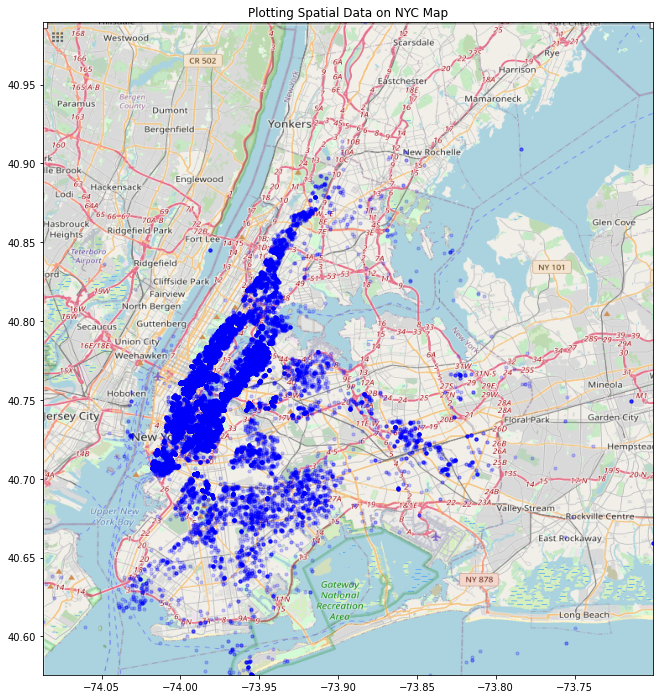

In [10]:
nyc_map = plt.imread('NYC_Map.png') # Load the NYC Map for use in plotting the latitude/longitude in the dataframe

fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(df.longitude, df.latitude, alpha= 0.2, c='b', s=10) # Create the plot

ax.set_title('Plotting Spatial Data on NYC Map')
ax.set_xlim(BBox[0],BBox[1]) # Set the limits for the x-axis based on the bounding box results
ax.set_ylim(BBox[2],BBox[3]) # Set the limits for the y-axis based on the bounding box results
ax.imshow(nyc_map, zorder=0, extent = BBox, aspect= 'equal') # Use the NYC Map as the underlayer for the scatterplot of the latitude/longitude

In [11]:
df['ratio_bed/bath'] = df['bedrooms'] / df['bathrooms'] # Create new feature with the ratio between bedrooms and bathrooms
df['ratio_bed/bath']

created
2016-06-24 07:54:24    2.0
2016-06-12 12:19:27    2.0
2016-04-17 03:26:41    1.0
2016-04-18 02:22:02    1.0
2016-04-28 01:32:41    4.0
                      ... 
2016-06-02 05:41:05    2.0
2016-04-04 18:22:34    1.0
2016-04-16 02:13:40    1.0
2016-04-08 02:13:33    0.0
2016-04-12 02:48:07    2.0
Name: ratio_bed/bath, Length: 47109, dtype: float64

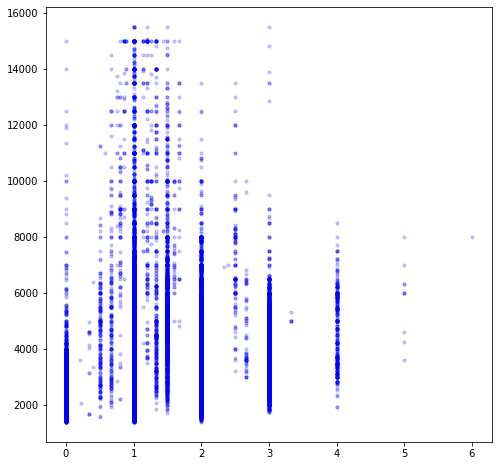

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df['ratio_bed/bath'], df['price'], alpha= 0.2, c='b', s=10) # Create the price to ratio_beds/baths plot

In [13]:
df['pets_allowed'] = df['cats_allowed'] + df['dogs_allowed'] # Create new feature adding whether cats and/or dogs are allowed as pets
df['pets_allowed']

created
2016-06-24 07:54:24    0
2016-06-12 12:19:27    2
2016-04-17 03:26:41    0
2016-04-18 02:22:02    0
2016-04-28 01:32:41    0
                      ..
2016-06-02 05:41:05    0
2016-04-04 18:22:34    2
2016-04-16 02:13:40    2
2016-04-08 02:13:33    2
2016-04-12 02:48:07    0
Name: pets_allowed, Length: 47109, dtype: int64

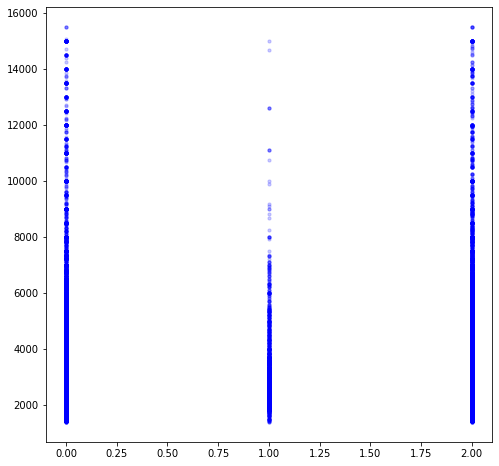

In [14]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df['pets_allowed'], df['price'], alpha= 0.2, c='b', s=10) # Create the price to pets_allowed plot

In [15]:
df['laundry'] = df['laundry_in_building'] + df['laundry_in_unit'] # Create new feature as to whether there is laundry either in-building or in-unit
df['laundry']

created
2016-06-24 07:54:24    0
2016-06-12 12:19:27    0
2016-04-17 03:26:41    1
2016-04-18 02:22:02    0
2016-04-28 01:32:41    0
                      ..
2016-06-02 05:41:05    1
2016-04-04 18:22:34    1
2016-04-16 02:13:40    0
2016-04-08 02:13:33    0
2016-04-12 02:48:07    0
Name: laundry, Length: 47109, dtype: int64

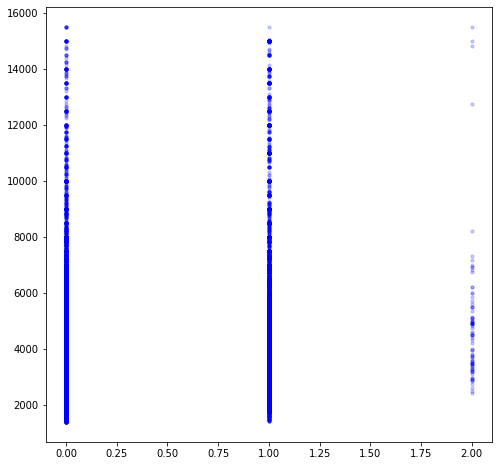

In [16]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df['laundry'], df['price'], alpha= 0.2, c='b', s=10) # Create the price to laundry plot

In [17]:
df['all_amenities'] = (df['elevator'] + df['cats_allowed'] + df['hardwood_floors'] + 
                       df['dogs_allowed'] + df['doorman'] + df['dishwasher'] + 
                       df['no_fee'] + df['laundry_in_building'] + df['fitness_center'] + 
                       df['pre-war'] + df['laundry_in_unit'] + df['roof_deck'] + 
                       df['outdoor_space'] + df['dining_room'] + df['high_speed_internet'] + 
                       df['balcony'] + df['swimming_pool'] + df['new_construction'] + 
                       df['terrace'] + df['exclusive'] + df['loft'] + df['garden_patio'] + 
                       df['wheelchair_access'] + df['common_outdoor_space']) # Create new feature of adding all of the amenities in a given apartment listing

df['all_amenities']

created
2016-06-24 07:54:24    0
2016-06-12 12:19:27    5
2016-04-17 03:26:41    3
2016-04-18 02:22:02    2
2016-04-28 01:32:41    1
                      ..
2016-06-02 05:41:05    5
2016-04-04 18:22:34    9
2016-04-16 02:13:40    5
2016-04-08 02:13:33    5
2016-04-12 02:48:07    1
Name: all_amenities, Length: 47109, dtype: int64

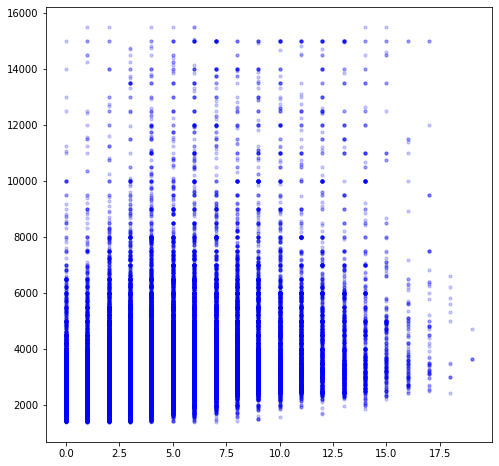

In [18]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df['all_amenities'], df['price'], alpha= 0.2, c='b', s=10) # Create the price to all_amenities plot

In [94]:
df['all_rooms'] = df['bathrooms'] + df['bedrooms'] + df['dining_room'] # Create new feature of adding all of the rooms in a given apartment listing

df['all_rooms']

created
2016-06-24 07:54:24    4.5
2016-06-12 12:19:27    3.0
2016-04-17 03:26:41    2.0
2016-04-18 02:22:02    2.0
2016-04-28 01:32:41    5.0
                      ... 
2016-06-02 05:41:05    3.0
2016-04-04 18:22:34    2.0
2016-04-16 02:13:40    2.0
2016-04-08 02:13:33    1.0
2016-04-12 02:48:07    3.0
Name: all_rooms, Length: 47109, dtype: float64

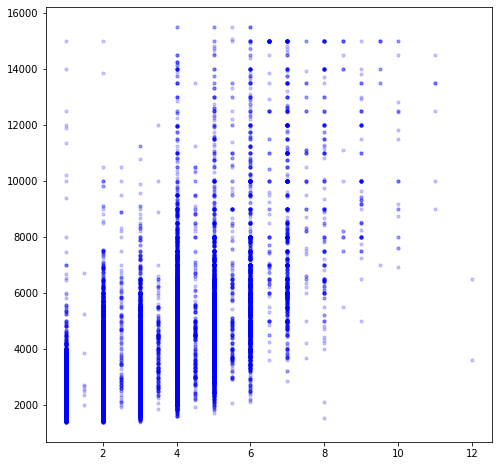

In [95]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df['all_rooms'], df['price'], alpha= 0.2, c='b', s=10) # Create the price to all_rooms plot

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [67]:
features = ['ratio_bed/bath',	'pets_allowed'] # Set up model using the ratio bedrooms/bathrooms and the pets_allowed features
X = df[features]
y = df['price']

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [99]:
train =  df[df.index < '2016-06-01']
test = df[df.index >= '2016-06-01']
X_train, y_train = train[features], train['price']
X_test, y_test = test[features], test['price']

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [69]:
from sklearn.metrics import mean_absolute_error

guess_train = y_train.mean()
y_pred_train = [guess_train] * len(y_train)

baseline_mae_train = mean_absolute_error(y_train, y_pred_train)
print('Baseline MAE for training set is:', baseline_mae_train)

Baseline MAE for training set is: 1202.972340636346


In [70]:
guess_test = y_test.mean()
y_pred_test = [guess_test] * len(y_test)

baseline_mae_test = mean_absolute_error(y_test, y_pred_test)
print('Baseline MAE for test set is:', baseline_mae_test)

Baseline MAE for test set is: 1204.6323797195153


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [74]:
pd.set_option('use_inf_as_na', True) # Set option to treat infinite values as NaN

X_train = X_train.dropna() # Drop the NaN values (formerly infinite values in ratio bedrooms/bathrooms due to some bathroom values == 0)

In [75]:
X_train

,ratio_bed/bath,pets_allowed
created,,
2016-04-17 03:26:41,1.0,0
2016-04-18 02:22:02,1.0,0
2016-04-28 01:32:41,4.0,0
2016-04-19 04:24:47,2.0,0
2016-04-27 03:19:56,2.0,2
...,...,...
2016-04-22 15:44:11,1.0,1
2016-04-04 18:22:34,1.0,2
2016-04-16 02:13:40,1.0,2


In [81]:
feature_bed_bath_price = ['ratio_bed/bath', 'price'] 
y_train = train[feature_bed_bath_price] # Re-establish y_train to include ratio_bed/bath with infinite values so as to be able to drop same infinite rows as in X_train
y_train = y_train.dropna() # Drop infinite rows
y_train = y_train.drop(labels = 'ratio_bed/bath', axis = 'columns') # Drop 'ratio_bed/bath' column

In [82]:
y_train

,price
created,
2016-04-17 03:26:41,2850
2016-04-18 02:22:02,3275
2016-04-28 01:32:41,3350
2016-04-19 04:24:47,7995
2016-04-27 03:19:56,3600
...,...
2016-04-22 15:44:11,4500
2016-04-04 18:22:34,3950
2016-04-16 02:13:40,2595


In [83]:
# Step 1: Import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
X_test = X_test.dropna()
y_test = test[feature_bed_bath_price] # Re-establish y_test to include ratio_bed/bath with infinite values so as to be able to drop same infinite rows as in X_test
y_test = y_test.dropna() # Drop infinite rows
y_test = y_test.drop(labels = 'ratio_bed/bath', axis = 'columns') # Drop 'ratio_bed/bath' column
print(X_test.shape, y_test.shape)

(16341, 2) (16341, 1)


In [85]:
model_test = LinearRegression()

# Step 3: Fit predictor on the (test) data

model_test.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [86]:
y_pred_train_bed_bath_pets = model.predict(X_train) # Calculate the y_pred for this model on the training dataset
y_pred_test_bed_bath_pets = model_test.predict(X_test) # Calculate the y_pred for this model on the test dataset

training_mae = mean_absolute_error(y_train, y_pred_train_bed_bath_pets)

test_mae = mean_absolute_error(y_test, y_pred_test_bed_bath_pets)

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 1129.804910264676
Test MAE: 1142.3410286507612


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [88]:
from sklearn.metrics import r2_score

training_r2 = r2_score(y_train, y_pred_train_bed_bath_pets) # Use the r2_score function to calculate the R^2 score for this model on the training dataset

test_r2 = r2_score(y_test, y_pred_test_bed_bath_pets) # Use the r2_score function to calculate the R^2 score for this model on the test dataset

print('Training R^2 score:', training_r2)
print('Test R^2 score:', test_r2)

Training MAE: 0.050727035323478
Test MAE: 0.04593103407489041


In [90]:
print('The slope coeficients for the training dataset are:', model.coef_)
print('The slope coeficients for the test dataset are:', model_test.coef_)

The slope coeficients for the training dataset are: [[441.77588073 100.07256407]]
The slope coeficients for the test dataset are: [[417.92590177 103.95908768]]


# ***Repeat Multiple Regression Model using 'pets_allowed' and 'laundry' features***

In [97]:
features_PL = ['pets_allowed', 'laundry'] # Set up model using the pets_allowed and laundry ("PL") features
X = df[features_PL]
y = df['price']

X_train_PL, y_train_PL = train[features_PL], train['price']
X_test_PL, y_test_PL = test[features_PL], test['price']

model_train_PL = LinearRegression()
model_test_PL = LinearRegression()

model_train_PL.fit(X_train_PL, y_train_PL)
model_test_PL.fit(X_test_PL, y_test_PL)

y_pred_train_PL = model_train_PL.predict(X_train_PL) # Calculate the y_pred for the PL model on the training dataset
y_pred_test_PL = model_test_PL.predict(X_test_PL) # Calculate the y_pred for the PL model on the test dataset

training_mae_PL = mean_absolute_error(y_train_PL, y_pred_train_PL)

test_mae_PL = mean_absolute_error(y_test_PL, y_pred_test_PL)

print('Training MAE for PL model:', training_mae_PL)
print('Test MAE for PL model:', test_mae_PL)

training_r2_PL = r2_score(y_train_PL, y_pred_train_PL) # Use the r2_score function to calculate the R^2 score for the PL model on the training dataset

test_r2_PL = r2_score(y_test_PL, y_pred_test_PL) # Use the r2_score function to calculate the R^2 score for the PL model on the test dataset

print('Training R^2 score for PL model:', training_r2_PL)
print('Test R^2 score for PL model:', test_r2_PL)

Training MAE for PL model: 1168.9419343626266
Test MAE for PL model: 1174.669097090575
Training R^2 score for PL model: 0.060230002805339855
Test R^2 score for PL model: 0.054133697034577266


# ***Repeat Multiple Regression Model using 'ratio_bed/bath' and 'all_amenities' features***

In [93]:
features_r_am = ['ratio_bed/bath', 'all_amenities'] # Set up model using the ratio_bedrooms/bathrooms and all_amenities ("r_am") features
X = df[features_r_am]
y = df['price']

X_train_r_am = train[features_r_am]
X_train_r_am = X_train_r_am.dropna() # Drop infinite rows

y_train_r_am = train[feature_bed_bath_price] # Re-establish y_train_r_am to include ratio_bed/bath with infinite values so as to be able to drop same infinite rows as in X_train_r_am
y_train_r_am = y_train_r_am.dropna() # Drop infinite rows
y_train_r_am = y_train_r_am.drop(labels = 'ratio_bed/bath', axis = 'columns') # Drop 'ratio_bed/bath' column from y_train_r_am

X_test_r_am = test[features_r_am]
X_test_r_am = X_test_r_am.dropna() # Drop infinite rows

y_test_r_am = test[feature_bed_bath_price] # Re-establish y_test_r_am to include ratio_bed/bath with infinite values so as to be able to drop same infinite rows as in X_test_r_am
y_test_r_am = y_test_r_am.dropna() # Drop infinite rows
y_test_r_am = y_test_r_am.drop(labels = 'ratio_bed/bath', axis = 'columns') # Drop 'ratio_bed/bath' column from y_test_r_am

model_train_r_am = LinearRegression()
model_test_r_am = LinearRegression()

model_train_r_am.fit(X_train_r_am, y_train_r_am)
model_test_r_am.fit(X_test_r_am, y_test_r_am)

y_pred_train_r_am = model_train_r_am.predict(X_train_r_am) # Calculate the y_pred for the Ratio/Amenities model on the training dataset
y_pred_test_r_am = model_test_r_am.predict(X_test_r_am) # Calculate the y_pred for the Ratio/Amenities model on the test dataset

training_mae_r_am = mean_absolute_error(y_train_r_am, y_pred_train_r_am)

test_mae_r_am = mean_absolute_error(y_test_r_am, y_pred_test_r_am)

print('Training MAE for Ratio/Amenities model:', training_mae_r_am)
print('Test MAE for Ratio/Amenities model:', test_mae_r_am)

training_r2_r_am = r2_score(y_train_r_am, y_pred_train_r_am) # Use the r2_score function to calculate the R^2 score for the Ratio/Amentities model on the training dataset

test_r2_r_am = r2_score(y_test_r_am, y_pred_test_r_am) # Use the r2_score function to calculate the R^2 score for the Ratio/Amenities model on the test dataset

print('Training R^2 score for the Ratio/Amenities model:', training_r2_r_am)
print('Test R^2 score for the Ratio/Amenities model:', test_r2_r_am)

Training MAE for Ratio/Amenities model: 1065.7069572108378
Test MAE for Ratio/Amenities model: 1073.3464424240267
Training R^2 score for the Ratio/Amenities model: 0.14183499538861843
Test R^2 score for the Ratio/Amenities model: 0.1426092765004563


# ***Repeat Multiple Regression Model using 'all_rooms' and 'all_amenities' features***

In [100]:
features_ar_am = ['all_rooms', 'all_amenities'] # Set up model using the All Rooms and All Amenities ("ar_am") features
X = df[features_ar_am]
y = df['price']

X_train_ar_am, y_train_ar_am = train[features_ar_am], train['price']
X_test_ar_am, y_test_ar_am = test[features_ar_am], test['price']

model_train_ar_am = LinearRegression()
model_test_ar_am = LinearRegression()

model_train_ar_am.fit(X_train_ar_am, y_train_ar_am)
model_test_ar_am.fit(X_test_ar_am, y_test_ar_am)

y_pred_train_ar_am = model_train_ar_am.predict(X_train_ar_am) # Calculate the y_pred for the Rooms/Amenities model on the training dataset
y_pred_test_ar_am = model_test_ar_am.predict(X_test_ar_am) # Calculate the y_pred for the Rooms/Amenities model on the test dataset

training_mae_ar_am = mean_absolute_error(y_train_ar_am, y_pred_train_ar_am)

test_mae_ar_am = mean_absolute_error(y_test_ar_am, y_pred_test_ar_am)

print('Training MAE for the Rooms/Amenities model:', training_mae_ar_am)
print('Test MAE for the Rooms/Amenities model:', test_mae_ar_am)

training_r2_ar_am = r2_score(y_train_ar_am, y_pred_train_ar_am) # Use the r2_score function to calculate the R^2 score for the Rooms/Amenities model on the training dataset

test_r2_ar_am = r2_score(y_test_ar_am, y_pred_test_ar_am) # Use the r2_score function to calculate the R^2 score for the Rooms/Amenities model on the test dataset

print('Training R^2 score for the Rooms/Amenities model:', training_r2_ar_am)
print('Test R^2 score for the Rooms/Amenities model:', test_r2_ar_am)

Training MAE for the Rooms/Amenities model: 859.3058583736181
Test MAE for the Rooms/Amenities model: 873.2118380440987
Training R^2 score for the Rooms/Amenities model: 0.458015310826987
Test R^2 score for the Rooms/Amenities model: 0.46246044271657094


# ***Repeat Multiple Regression Model using 'ratio_bed/bath' and 'all_rooms' features***

In [103]:
features_r_rm = ['ratio_bed/bath', 'all_rooms'] # Set up model using the ratio_bedrooms/bathrooms and all_rooms ("r_rm") features
X = df[features_r_rm]
y = df['price']

X_train_r_rm = train[features_r_rm]
X_train_r_rm = X_train_r_rm.dropna() # Drop infinite rows

y_train_r_rm = train[feature_bed_bath_price] # Re-establish y_train_r_rm to include ratio_bed/bath with infinite values so as to be able to drop same infinite rows as in X_train_r_rm
y_train_r_rm = y_train_r_rm.dropna() # Drop infinite rows
y_train_r_rm = y_train_r_rm.drop(labels = 'ratio_bed/bath', axis = 'columns') # Drop 'ratio_bed/bath' column from y_train_r_rm

X_test_r_rm = test[features_r_rm]
X_test_r_rm = X_test_r_rm.dropna() # Drop infinite rows

y_test_r_rm = test[feature_bed_bath_price] # Re-establish y_test_r_rm to include ratio_bed/bath with infinite values so as to be able to drop same infinite rows as in X_test_r_rm
y_test_r_rm = y_test_r_rm.dropna() # Drop infinite rows
y_test_r_rm = y_test_r_rm.drop(labels = 'ratio_bed/bath', axis = 'columns') # Drop 'ratio_bed/bath' column from y_test_r_rm

model_train_r_rm = LinearRegression()
model_test_r_rm = LinearRegression()

model_train_r_rm.fit(X_train_r_rm, y_train_r_rm)
model_test_r_rm.fit(X_test_r_rm, y_test_r_rm)

y_pred_train_r_rm = model_train_r_rm.predict(X_train_r_rm) # Calculate the y_pred for the Ratio/All Rooms model on the training dataset
y_pred_test_r_rm = model_test_r_rm.predict(X_test_r_rm) # Calculate the y_pred for the Ratio/All Rooms model on the test dataset

training_mae_r_rm = mean_absolute_error(y_train_r_rm, y_pred_train_r_rm)

test_mae_r_rm = mean_absolute_error(y_test_r_rm, y_pred_test_r_rm)

print('Training MAE for the Ratio/All Rooms model:', training_mae_r_rm)
print('Test MAE for the Ratio/All Rooms model:', test_mae_r_rm)

training_r2_r_rm = r2_score(y_train_r_rm, y_pred_train_r_rm) # Use the r2_score function to calculate the R^2 score for the Ratio/All Rooms model on the training dataset

test_r2_r_rm = r2_score(y_test_r_rm, y_pred_test_r_rm) # Use the r2_score function to calculate the R^2 score for the Ratio/All Rooms model on the test dataset

print('Training R^2 score for the Ratio/All Rooms model:', training_r2_r_rm)
print('Test R^2 score for the Ratio/All Rooms model:', test_r2_r_rm)

print('The slope coeficients for the training dataset are:', model_train_r_rm.coef_)
print('The intercept for the training dataset is:', model_train_r_rm.intercept_)
print('The slope coeficients for the test dataset are:', model_test_r_rm.coef_)
print('The intercept for the test dataset is:', model_test_r_rm.intercept_)

Training MAE for the Ratio/All Rooms model: 836.2965432956707
Test MAE for the Ratio/All Rooms model: 842.8195962984231
Training R^2 score for the Ratio/All Rooms model: 0.5028398929179436
Test R^2 score for the Ratio/All Rooms model: 0.5136631758979617
The slope coeficients for the training dataset are: [[-669.38443299 1015.77616172]]
The intercept for the training dataset is: [1515.60447387]
The slope coeficients for the test dataset are: [[-703.59815161 1035.89450996]]
The intercept for the test dataset is: [1519.51038806]


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

The three most influential coefficients are from the model which uses the newly engineered features of All Rooms (Bedrooms + Bathrooms + Dining Room) and the Ratio between Bedrooms and Bathrooms. Using this model, the Test Dataset coefficients are as follows:

*   Intercept: 1,519.51
*   Slope Coefficient for Ratio Bed/Bath: -703.60
*   Slope Coefficient for All Rooms: 1035.89